# Lab 04b: Aliasing of digital sampling

In [1]:
%matplotlib inline

import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

## Aliasing: Trianglar sound wave

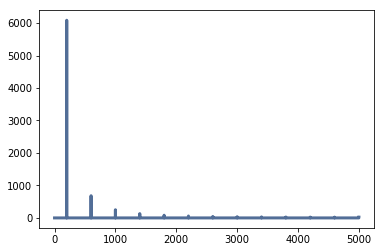

In [2]:
frequency = 200
framerate = 10000

triangle_sig = thinkdsp.TriangleSignal(freq=frequency, amp=1, offset=0)
triangle_wave = triangle_sig.make_wave(duration=1.5, start=0, framerate=framerate)
sp = triangle_wave.make_spectrum()
sp.plot()

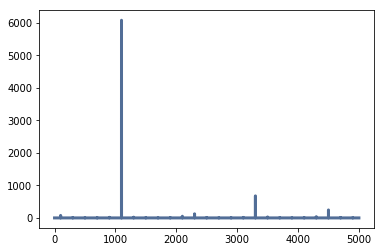

In [3]:
frequency = 1100
framerate = 10000

triangle_sig = thinkdsp.TriangleSignal(freq=frequency, amp=1, offset=0)
triangle_wave = triangle_sig.make_wave(duration=1.5, start=0, framerate=framerate)
sp = triangle_wave.make_spectrum()
sp.plot()

## Aliasing: a single cosine sound wave

In [4]:
frequency = 450
framerate = 1000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

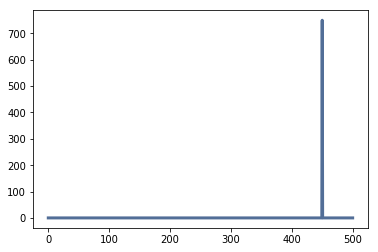

In [5]:
sp = cos_wave.make_spectrum()
sp.plot()

In [6]:
frequency = 550
framerate = 1000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

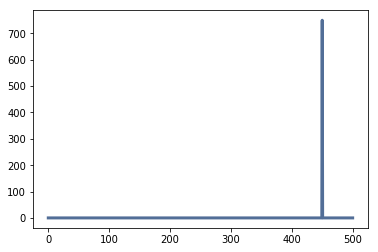

In [7]:
sp = cos_wave.make_spectrum()
sp.plot()

In [8]:
frequency = 550
framerate = 2000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

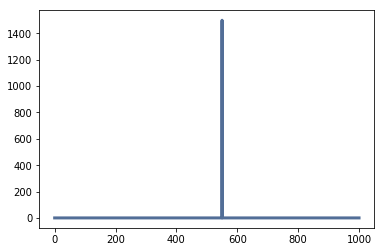

In [9]:
sp = cos_wave.make_spectrum()
sp.plot()

## Aliasing: Chirp

In [10]:
def half_framerate(w):
    fr = w.framerate/2
    l = round(len(w.ys)/2)
    ys = [0.0]*l
    ts = [0.0]*l
    for i in range(l):
        ys[i] = w.ys[i*2]
        ts[i] = w.ts[i*2]
    w2 = thinkdsp.Wave(ys,ts,fr)
    return(w2)

In [11]:
signal = thinkdsp.Chirp(start=220, end=880)
wave = signal.make_wave(duration=3, framerate=2000)
wave.make_audio()

In [12]:
wave_half = half_framerate(wave)
wave_half.make_audio()

In [13]:
print(wave_half.framerate)

1000.0


## Aliasing: wave file

### Generate wave file

In [14]:
triangle_sig = thinkdsp.TriangleSignal(freq=200, amp=1, offset=0)
triangle_wave = triangle_sig.make_wave(duration=1.5, start=0, framerate=10000)
sp1 = triangle_wave.make_spectrum()
sp1.low_pass(3000)
w1 = sp1.make_wave()
w1.write("triangle_mod.wav")

Writing triangle_mod.wav


### Read wave file

In [15]:
wave = thinkdsp.read_wave("triangle_mod.wav")
wave.make_audio()

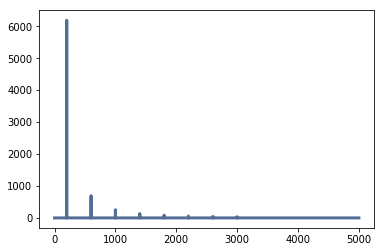

In [16]:
sp = wave.make_spectrum()
sp.plot()

In [17]:
print(wave.framerate)

10000


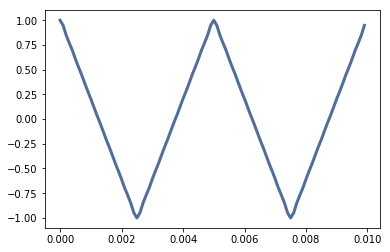

In [18]:
seg = wave.segment(0,0.01)
seg.plot()

### Reduce framerate

In [19]:
wave_half = half_framerate(wave)
wave_half.make_audio()

In [20]:
print(wave_half.framerate)

5000.0


### Note the aliasing

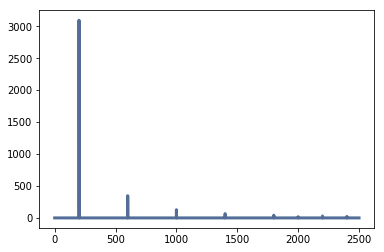

In [21]:
sp_half = wave_half.make_spectrum()
sp_half.plot()